In [5]:
import pandas as pd 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string
import nltk

In [9]:
df = pd.read_csv("twitter_training.csv")

In [11]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [19]:
df.columns = df.columns.str.replace('2401', 'number')
df.columns = df.columns.str.replace('2401', 'number')
df.columns = df.columns.str.replace('Borderlands', 'company')
df.columns = df.columns.str.replace('Positive', 'emotions')
df.columns = df.columns.str.replace('im getting on borderlands and i will murder you all ,', 'comments')

In [21]:
df

,number,company,emotions,comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [23]:
#remove special char number and punctuation
df['comments'] = df['comments'].str.replace("[^a-zA]","")

In [25]:
df

,number,company,emotions,comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [41]:
#individual words considered as token
from nltk.tokenize import word_tokenize
tokenized_tweets = df['comments'].apply(lambda x: x.split() if isinstance(x, str) else [])

In [43]:
tokenized_tweets.head()

0    [I, am, coming, to, the, borders, and, I, will...
1    [im, getting, on, borderlands, and, i, will, k...
2    [im, coming, on, borderlands, and, i, will, mu...
3    [im, getting, on, borderlands, 2, and, i, will...
4    [im, getting, into, borderlands, and, i, can, ...
Name: comments, dtype: object

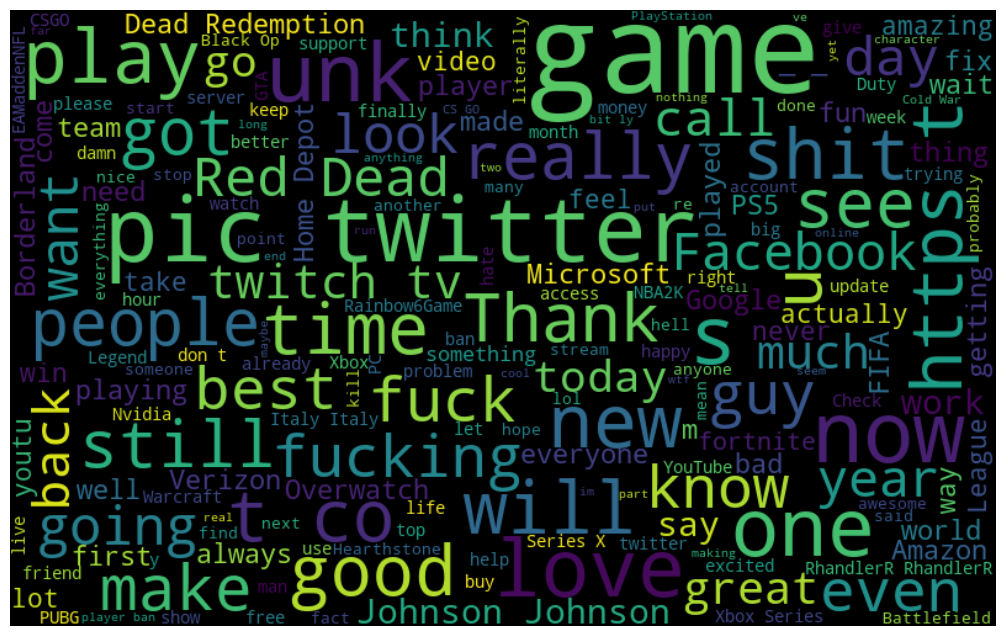

In [79]:
#visualize most frequent word used 
import wordcloud
from wordcloud import WordCloud
all_words=  ' '.join(df['comments'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800 , height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    74681 non-null  int64 
 1   company   74681 non-null  object
 2   emotions  74681 non-null  object
 3   comments  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Text(0, 0.5, 'count')

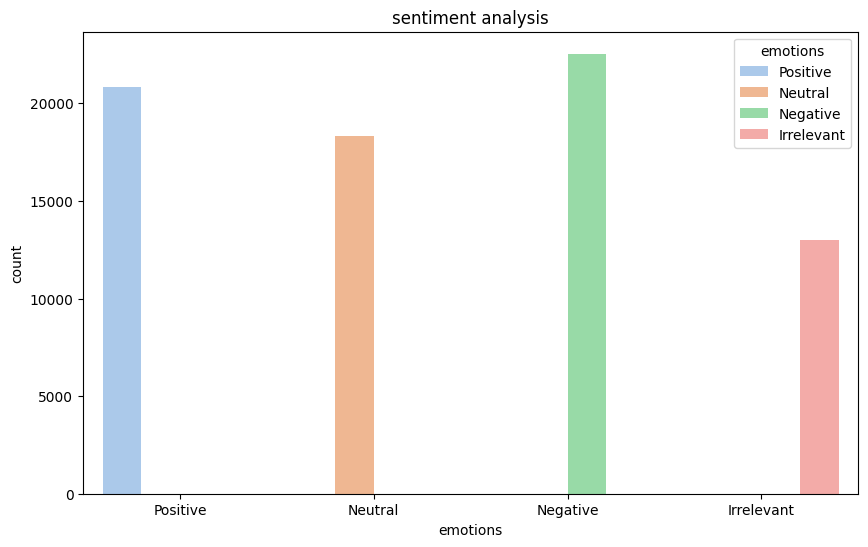

In [97]:
plt.figure(figsize=(10,6))
sns.countplot(x='emotions' , data =df , palette='pastel' , hue='emotions') 
plt.title('sentiment analysis')
plt.xlabel('emotions')
plt.ylabel('count')

<function matplotlib.pyplot.show(close=None, block=None)>

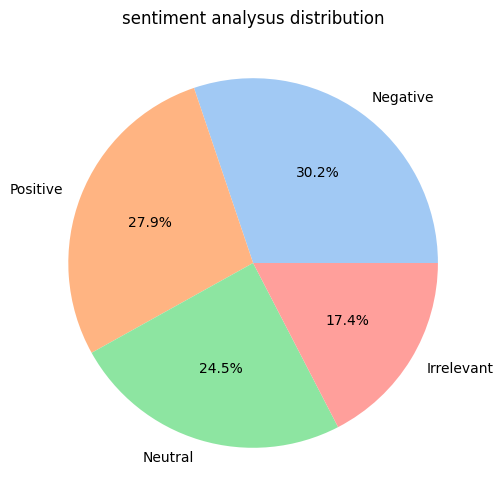

In [105]:
#pie
emotion_counts = df['emotions'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(emotion_counts , labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('sentiment analysus distribution')
plt.show

In [107]:
df.describe()

,number
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000
